In [1]:
# from https://statsthinking21.github.io/statsthinking21-python/08-HypothesisTesting.html

import numpy as np
import pandas as pd

num_runs = 10000


def toss_coins_and_count_heads(rng, num_coins=100, p_heads=0.5):
    """
    flip a coin num_coins times and return number of heads
    """
    flips = rng.random(num_coins) > (1 - p_heads)
    return(np.sum(flips))


In [2]:
rng = np.random.default_rng()
sim = pd.DataFrame({'n_heads': np.zeros(num_runs)})

for run in range(num_runs):
    sim.loc[run, 'n_heads'] = toss_coins_and_count_heads(rng)

In [3]:
sim.head()

,n_heads
0,46.0
1,51.0
2,53.0
3,54.0
4,51.0


In [4]:
import scipy.stats

pvalue = 100 - scipy.stats.percentileofscore(sim, 70) 
pvalue

0.0

In [5]:
p_real = 1 - scipy.stats.binom.cdf(k=69, n=100, p=0.5)
p_real

3.925069822796612e-05

In [6]:
num_runs = 5000


# create a function that will take a sample
# and perform a one-sample t-test
def sample_ttest(sampSize=32):
    """
    perform a ttest on random data of n=sampSize
    """

    ttresult = scipy.stats.ttest_1samp(np.random.normal(loc=0.0, scale=1.0, size=sampSize), 0)
    return(ttresult.pvalue)


# create input data frame for the function
sim_results_df = pd.DataFrame({'p_value': np.zeros(num_runs)})

# perform simulations
for run in range(num_runs):
    sim_results_df.loc[run, 'p_value'] = sample_ttest()

p_error = sim_results_df['p_value'] < 0.05
p_error = p_error.mean(axis=0)
p_error

0.0564

In [7]:

import scipy.stats
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt

power_analysis = smp.TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=0.5, power=0.8, alpha=0.05)
sample_size

63.76561177540986

<IPython.core.display.Javascript object>


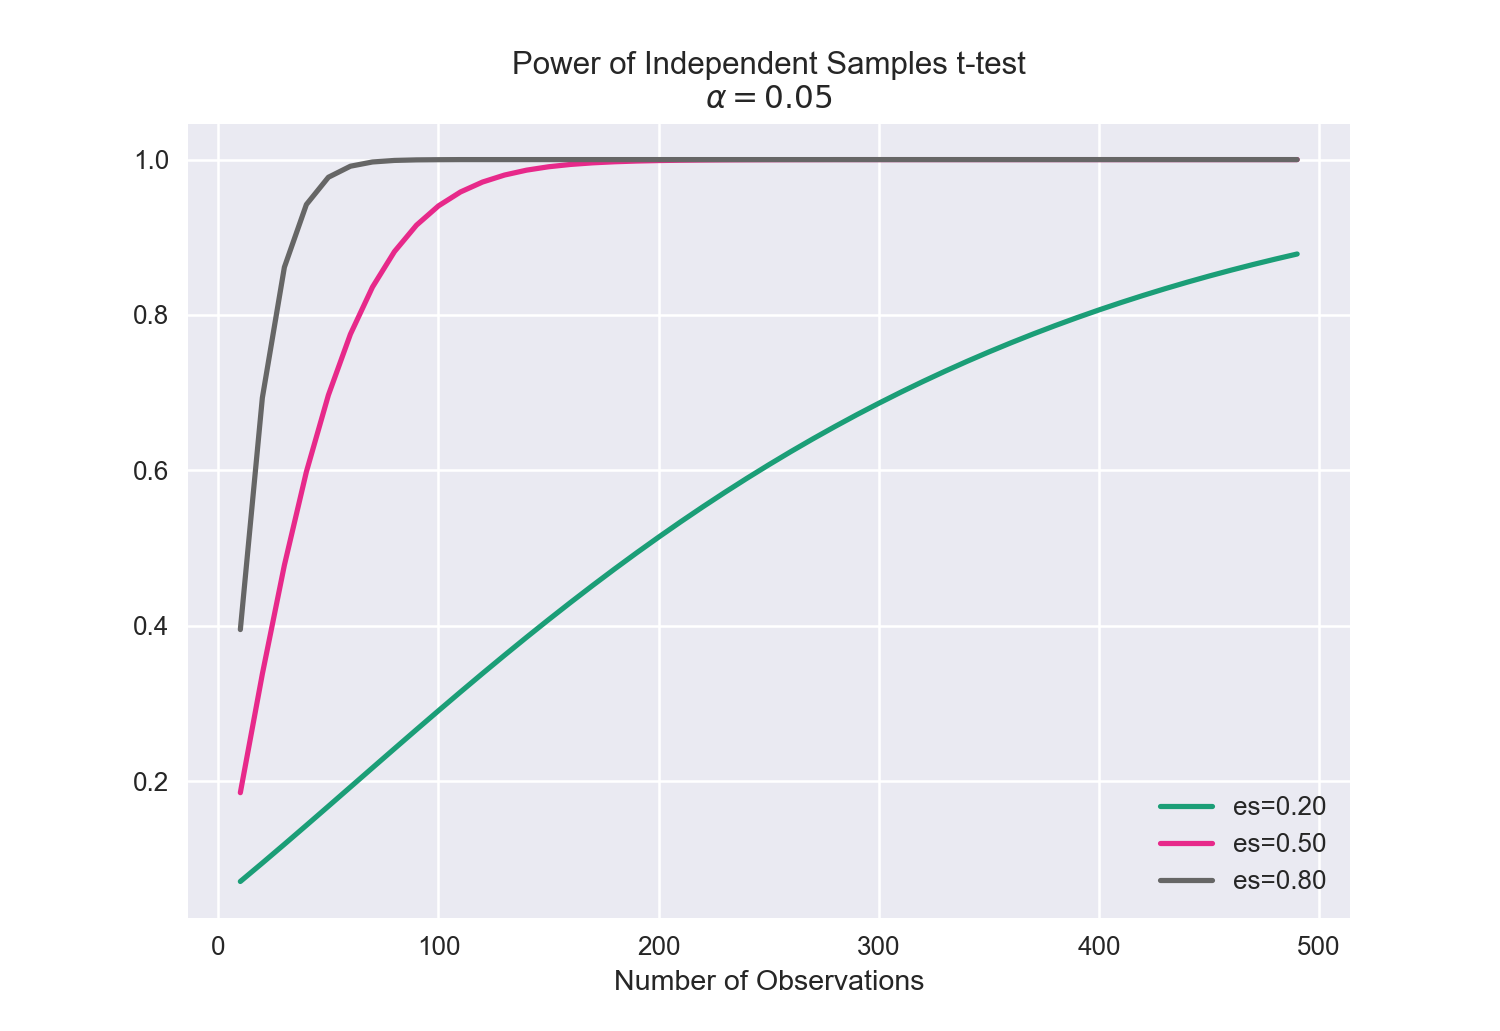

In [8]:
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(10, 500, 10))

plt.style.use('seaborn')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig = power_analysis.plot_power(
    dep_var='nobs', nobs=sample_sizes,  
    effect_size=effect_sizes, alpha=0.05, ax=ax, 
    title='Power of Independent Samples t-test\n$\\alpha = 0.05$')

In [9]:
num_runs = 5000
effectSize = 0.5

power = 0.8
# perform power analysis to get sample size
power_analysis = smp.TTestIndPower()
sampleSize = power_analysis.solve_power(
    effect_size=effectSize, power=power, alpha=0.05)

# round up from estimated sample size
sampleSize = np.int(np.ceil(sampleSize))
print(f"Estimation sample size {sampleSize} to achieve power {power}")

Estimation sample size 64 to achieve power 0.8


C:\Users\hutao\AppData\Local\Temp\ipykernel_5836\86431502.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sampleSize = np.int(np.ceil(sampleSize))


In [10]:
# create a function that will generate samples and test for
# a difference between groups using a two-sample t-test


def get_t_result(sampleSize, effectSize):
    """
    perform a ttest on random data of n=sampSize
    """
    
    group1 = np.random.normal(loc=0.0, scale=1.0, size=sampleSize)
    group2 = np.random.normal(loc=effectSize, scale=1.0, size=sampleSize)
    ttresult = scipy.stats.ttest_ind(group1, group2)
    return(ttresult.pvalue)


# create input data frame for output
power_sim_results = pd.DataFrame({'p_value': np.zeros(num_runs)})

for run in range(num_runs):
    power_sim_results.loc[run, 'p_value'] = get_t_result(sampleSize, effectSize)


p_reject = np.mean(power_sim_results['p_value'] < 0.05)
p_reject

0.8082

In [16]:
# bernullio
b_p = 0.03
pct_diff = 0.1
effect_size = b_p * pct_diff / np.sqrt(b_p*(1-b_p))
effect_size

0.017586311452816476

In [17]:
alpha = 0.05
power = 0.8
# perform power analysis to get sample size
power_analysis = smp.TTestIndPower()
sample_size = power_analysis.solve_power(
    effect_size=effect_size, power=power, alpha=alpha)
int(sample_size)

50756